# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [72]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [73]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

### Understanding the structure of the data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [74]:
# Write your code here to read the data
data = pd.read_csv('foodhub_order.csv')
data_orig = data.copy()

In [75]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [76]:
# Write your code here
data.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns in the food hub order dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [77]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 4 int64, 4 object and 1 float64 datatypes in the dataset. We can observe that there are no null values in the dataset from this information.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [78]:
# Write your code here
data['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [79]:
data['rating']=data['rating'].replace('Not given',np.nan)

In [10]:
data['rating'].value_counts(dropna=False)

NaN    736
5      588
4      386
3      188
Name: rating, dtype: int64

In [80]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

In [81]:
data['rating']= data['rating'].fillna(value=data.groupby('cuisine_type')['rating'].transform('median'))

In [83]:
data['rating'].value_counts(dropna=False)

5.00    1061
4.00     627
3.00     188
4.50      22
Name: rating, dtype: int64

In [42]:
#data['rating']= data['rating'].fillna(value=data.groupby('cuisine_type')['rating'].transform('mean'))

In [84]:
data['rating'].value_counts(dropna=False)

5.00    1061
4.00     627
3.00     188
4.50      22
Name: rating, dtype: int64

#### Observations: 

We can observe from the top 5 rows of the data that rating columns have "Not given" mentioned instead of rating. And the value_counts shows that we have around 736 rows of "Not give" in this column which is around 40%. Therefore, we need to consider them as null values and convert those into NaN.

After replacing the "Not given" values to NaN, we imputated the missing values with the mean for each restaurant. We observed that there are few restaurants whoch do not have any rating, hence we imputated those rows with the mean of each category for cuisine_type


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [94]:
data_copy.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.00,NaN,NaN,NaN,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [92]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [30]:
data_orig.groupby('rating')['cost_of_the_order'].mean()

rating
3           16.22
4           16.71
5           16.97
Not given   16.09
Name: cost_of_the_order, dtype: float64

In [87]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [22]:
data_copy = data_orig.copy()

In [23]:
data_copy['rating'] = pd.to_numeric(data_copy['rating'], errors='coerce')

<Axes: xlabel='rating', ylabel='Count'>

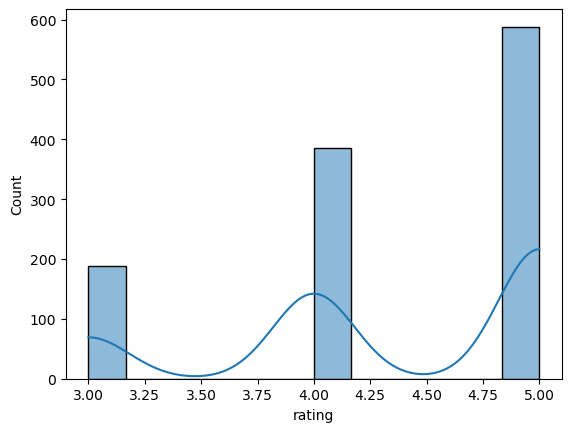

In [28]:
sns.histplot(data = data_copy,x='rating',kde = True)

<Axes: xlabel='rating', ylabel='cost_of_the_order'>

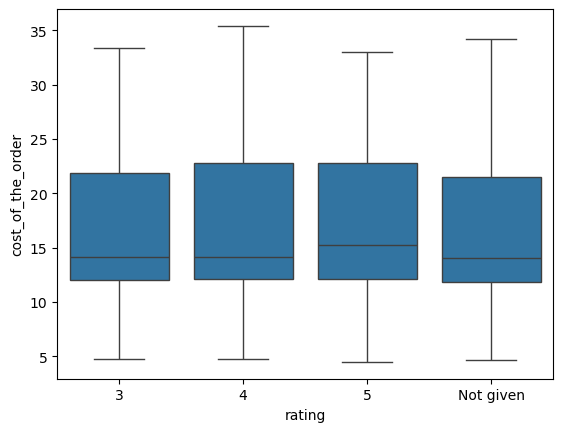

In [34]:
sns.boxplot(x='rating', y='cost_of_the_order', data=data_orig, order=['3','4','5','Not given'])

In [63]:
#Filter out “Not Given” before grouping
valid_data = data_orig[data_orig['rating'] != 'Not given']
#Count number of valid ratings per restaurant
rating_counts = valid_data.groupby('restaurant_name')['rating'].count()
#Get restaurants with >10 valid ratings
restaurants_10plus = rating_counts[rating_counts > 10].index
#Filter original data (if you want all rows for those restaurants)
filtered_data = valid_data[valid_data['restaurant_name'].isin(restaurants_10plus)]

In [66]:
filtered_data['restaurant_name'].value_counts()

Shake Shack                              133
The Meatball Shop                         84
Blue Ribbon Sushi                         73
Blue Ribbon Fried Chicken                 64
RedFarm Broadway                          41
Parm                                      39
RedFarm Hudson                            34
TAO                                       28
Rubirosa                                  24
Han Dynasty                               23
Nobu Next Door                            23
Momoya                                    22
Blue Ribbon Sushi Bar & Grill             22
Tamarind TriBeCa                          20
Jack's Wife Freda                         19
Blue Ribbon Sushi Izakaya                 18
Five Guys Burgers and Fries               18
Sushi of Gari 46                          17
Bareburger                                17
Chipotle Mexican Grill $1.99 Delivery     15
ilili Restaurant                          13
Sushi of Gari Tribeca                     13
Cafe Mogad

In [67]:
invalid_data = data_orig[data_orig['rating'] == 'Not given']

In [71]:
invalid_data['cost_of_the_order'].value_counts().sort_values(ascending = False)

12.18    39
12.13    32
12.23    19
12.08    16
24.25    15
         ..
6.40      1
11.84     1
15.13     1
10.14     1
7.95      1
Name: cost_of_the_order, Length: 215, dtype: int64

In [60]:
1898-736

1162

In [38]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1898.00,4.37,0.66,3.00,4.00,4.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:

The minimum it takes for food to be prepared is 20 mins and it takes maximum of 35 mins to prepare food. And on an average, it takes 27.37 mins to prepare food


### **Question 5:** How many orders are not rated? [1 mark]

In [48]:
# Write the code here
data_orig['rating'].value_counts(dropna=False)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
We can observe that 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

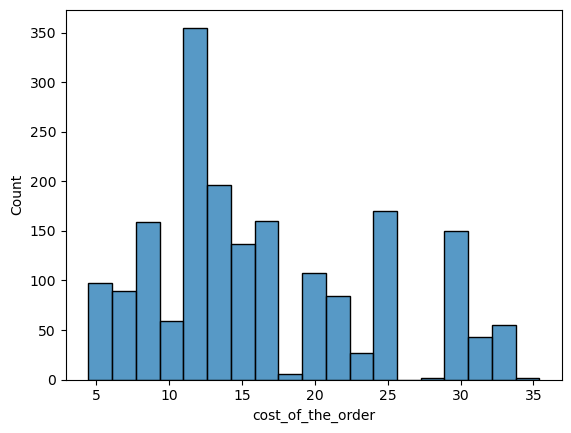

In [50]:
# Write the code here
sns.histplot(data = data, x='cost_of_the_order');

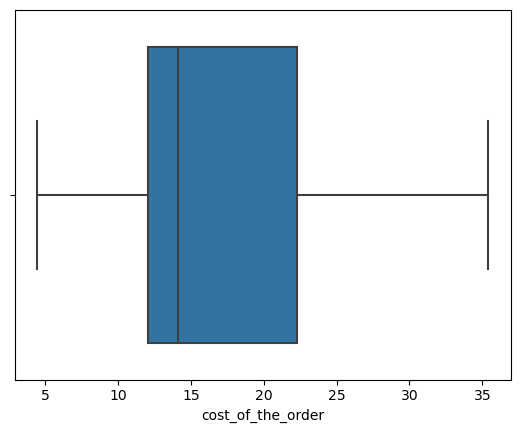

In [52]:
sns.boxplot(data = data, x='cost_of_the_order');

As per the boxplot, we can observe that the cost of the order distribution is highly right skewed.
Most of the orders are less priced. And thus the average price of the order is 16.5. 50% of the orders are priced between 12 to 22.
There are no outliers in the above boxplot.
IQR of the plot = Q3 - Q1 = 10.22

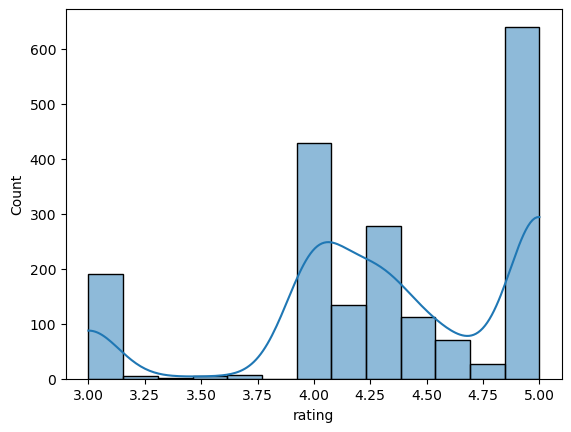

In [61]:
sns.histplot(data = data, x ='rating',kde=True);

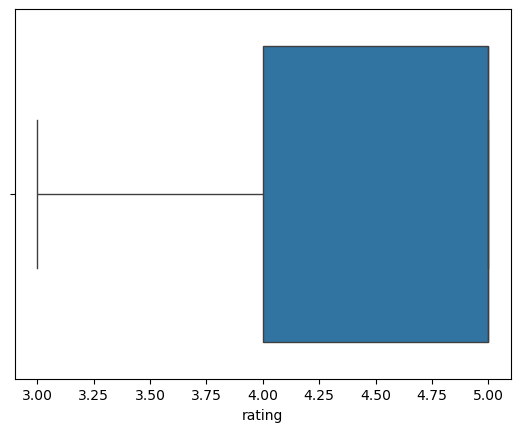

In [89]:
sns.boxplot(data = data_copy, x ='rating');

As we can observe that the median is closer to Q1 which shows that it is right skewed but the median is very close to mean so we can say it is slightly skewed but there is no right whisker which also indicates that this is left skewed. So quantatively, we tried using Quartile coefficient of skewness $K = ((Q3-Q2)-(Q2-Q1))/(Q3-Q1)$ and this K is 0.34 which is greater than 0 indicating a right skewed distribution

Most of the ratings are on the higher side and there are no ratings below 3

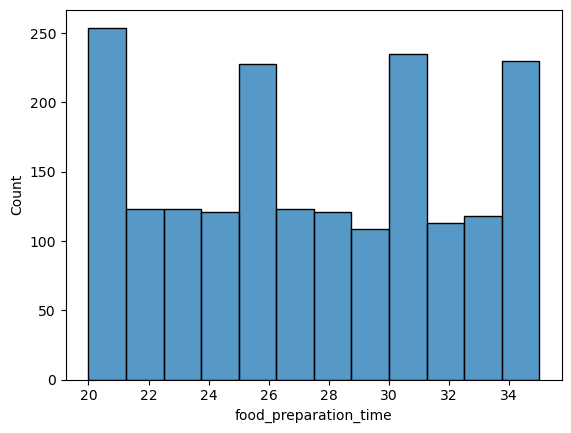

In [55]:
sns.histplot(data = data, x ='food_preparation_time');

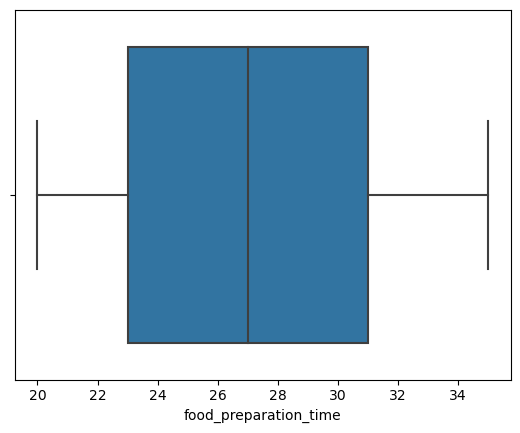

In [56]:
sns.boxplot(data = data, x ='food_preparation_time');

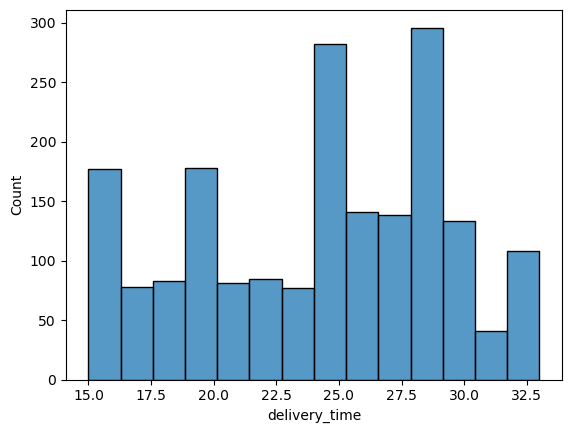

In [58]:
sns.histplot(data=data, x='delivery_time');

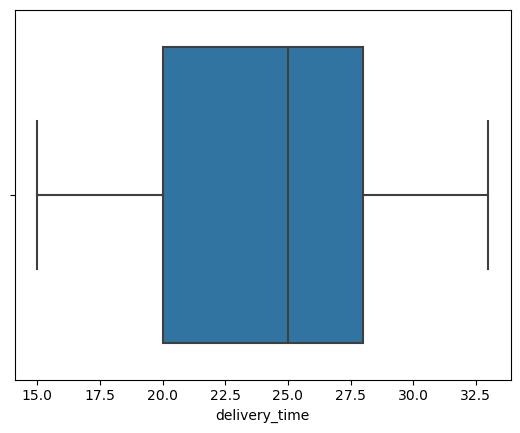

In [59]:
sns.boxplot(data=data, x='delivery_time');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [62]:
# Write the code here
data['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [69]:
data[data['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().sort_values(ascending=False).head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [77]:
# Write the code here
(((data['cost_of_the_order']>20).sum()/len(data))*100).round(2)

29.24

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [79]:
# Write the code here
(data['delivery_time'].mean()).round(2)

24.16

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [81]:
# Write the code here
data['customer_id'].value_counts().sort_values(ascending=False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [86]:
# Write the code here
data_copy.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index().query('mean > 4.0 and count > 50')

,restaurant_name,count,mean
20,Blue Ribbon Fried Chicken,64,4.33
21,Blue Ribbon Sushi,73,4.22
136,Shake Shack,133,4.28
153,The Meatball Shop,84,4.51


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---